# Data Preprocessing II

List of contents:
- **Cleansing data**
  - Text cleansing (regex) 
  - Removing conjunction and any common words (how, is, am, form etc) 
- **Pre-processing data**
  - Stemming 
  - Lemmatization 
  - Tokenization 
    - Bag of Works 
    - TF-IDF 
  - Imbalance data (supervised learning)
    - Oversampling
    - Undersampling
    - SMOTE


Created by: Ari Sulistiyo Prabowo

In [23]:
#import library
import pandas as pd
import numpy as np

#visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#wordcloud library
from wordcloud import WordCloud, STOPWORDS
import datetime, nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#machine learning library
from sklearn import svm
from sklearn import preprocessing, metrics, feature_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Reading Dataset

In [24]:
# pip install --upgrade xlrd

In [25]:
# news dataset
news_data = pd.read_excel("/content/drive/MyDrive/Data Ari Gmail/Data_Ari/Data_Science/Digital Skola/Indonesia Version/Data Preprocessing II/News Title.xls", sheet_name='Data Train')
news_data.head()

,No,News Title,Category
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,2,Dov Charney's Redeeming Quality,Business
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,4,"Google shows off Androids for wearables, cars,...",Technology
4,5,China May new bank loans at 870.8 bln yuan,Business


In [26]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No          65535 non-null  int64 
 1   News Title  65535 non-null  object
 2   Category    65535 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [27]:
# check any null values
print("how many null values", news_data.isnull().sum())

# check any duplicate values
print("how many duplicate values",news_data.duplicated().sum())

how many null values No            0
News Title    0
Category      0
dtype: int64
how many duplicate values 0


The news title dataset is free from null values and duplicated values

## Data cleansing

### Cleansing with regex (special character)

In [28]:
news_data['News Title Claned'] = news_data['News Title'].str.replace(r'[^A-Za-z0-9]+', ' ', regex=True)
news_data.head()

,No,News Title,Category,News Title Claned
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology,Google rolls out Stories for tricked out photo...
1,2,Dov Charney's Redeeming Quality,Business,Dov Charney s Redeeming Quality
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment,White God adds Un Certain Regard to the Palm Dog
3,4,"Google shows off Androids for wearables, cars,...",Technology,Google shows off Androids for wearables cars TVs
4,5,China May new bank loans at 870.8 bln yuan,Business,China May new bank loans at 870 8 bln yuan


### Cleansing Conjunction and Punctuation

In [29]:
def process_text(text):
  from nltk.corpus import stopwords 
  from nltk.tokenize import word_tokenize
  
  #remove the punction that is not important
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  nopunc = nopunc.lower()
  
  #remove useless word in data
  stop_words = set(stopwords.words('english')) 
  
  word_tokens = word_tokenize(nopunc) 
  
  clean_words = [w for w in word_tokens if not w in stop_words] 
  return clean_words

In [30]:
news_data['News Title'].apply(process_text)

0        [google, rolls, stories, tricked, photo, playb...
1                      [dov, charneys, redeeming, quality]
2        [white, god, adds, un, certain, regard, palm, ...
3          [google, shows, androids, wearables, cars, tvs]
4          [china, may, new, bank, loans, 8708, bln, yuan]
                               ...                        
65530    [xbox, one, homebrew, likely, reality, short, ...
65531    [maker, recalls, 19, million, rearfacing, infa...
65532              [watch, first, ninja, turtles, trailer]
65533    [23052014dogs, triumph, cannes, canine, thrill...
65534    [frontpoint, security, ceo, chris, villar, ran...
Name: News Title, Length: 65535, dtype: object

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
# example to take out the punctuation
nopunc = [char for char in news_data['News Title'][0] if char not in string.punctuation]
nopunc = ''.join(nopunc)
nopunc = nopunc.lower()
nopunc

'google rolls out stories for tricked out photo playback'

In [33]:
# example tokenization
word_tokens = word_tokenize(nopunc) 
word_tokens

['google',
 'rolls',
 'out',
 'stories',
 'for',
 'tricked',
 'out',
 'photo',
 'playback']

In [34]:
# example implementation of stopwords
stop_words = set(stopwords.words('english'))

clean_words = [w for w in word_tokens if not w in stop_words] 
clean_words

['google', 'rolls', 'stories', 'tricked', 'photo', 'playback']

## Data Pre-processing

### Stemming

In [35]:
# example implementation of stemming
ps = PorterStemmer()

stemmed_words = []

for w in clean_words:
  stemmed_words.append(ps.stem(w))

stemmed_words

['googl', 'roll', 'stori', 'trick', 'photo', 'playback']

### Lemmatization

In [ ]:
# example implementation of lemmatization 
lem = WordNetLemmatizer()

lem_words = []

for w in clean_words:
  lem_words.append(lem.lemmatize(w))

lem_words

['google', 'roll', 'story', 'tricked', 'photo', 'playback']

### Tokenization
- Bag of Work
- TF-IDF

In [40]:
def modelling(model, X_train, y_train, X_text, y_test):
  #basic machine learning
  MNB = model
  MNB.fit(X_train, y_train)

  y_train_pred = MNB.predict(X_train)
  y_test_pred = MNB.predict(X_text)

  # Compute accuracy on training set
  train_accuracy = MNB.score(X_train, y_train)

  # Compute accuracy on testing set
  test_accuracy = MNB.score(X_text, y_test)

  print('Training accuracy {:.2f}%'.format(train_accuracy*100))
  print('Testing accuracy {:.2f}%'.format(test_accuracy*100))

#### Bag of Work
CounterVectorizer provides a simple way to both build a vocabulary of known words and tokenize a collection of text, but also to encode new documents using that vocabulary.

An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared.

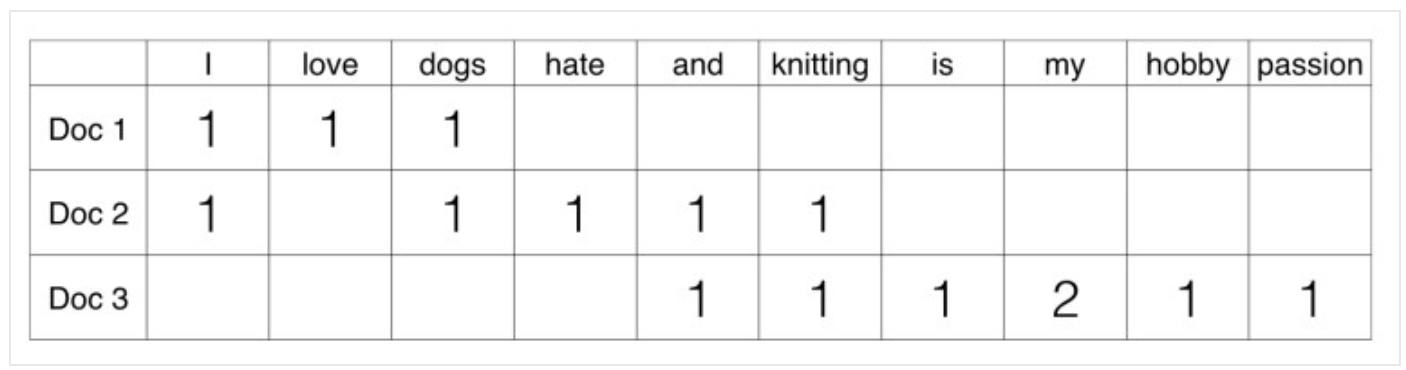

In [39]:
#example Bag of Word

sent1 = 'my favorite search engine is google'
sent2 = 'hell ya google'

cv = CountVectorizer()

X = cv.fit_transform([sent1,sent2])

bow_sklearn = pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
bow_sklearn.head()

,engine,favorite,google,hell,is,my,search,ya
0,1,1,1,0,1,1,1,0
1,0,0,1,1,0,0,0,1


In [41]:
# calculate the Bag of Word in news data
message_bow = CountVectorizer(analyzer=process_text).fit_transform(news_data['News Title'])
message_bow.shape

(65535, 33751)

In [43]:
#split the dataset into 80% training data and 20% testing data
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(message_bow, news_data['Category'], test_size=0.20, random_state=0)

In [44]:
# modelling and test the model with the test data
modelling(MultinomialNB(), X_train_bow, y_train_bow, X_test_bow, y_test_bow)

Training accuracy 93.94%
Testing accuracy 90.63%


#### TF-IDF
- Term Frequency(TF), count the number of words occur in each document. 
  - The formula = “number of occurrences of the word in the document” / “number of words in the document”
- IDF(Inverse Document Frequency), the amount of information a given word provides across the document.
  - The formula = "log(number of documents / number of documents that contain the word)"

In conclusion, TF-IDF is a way of measuring how relevant a word is to a document in a collection of documents.

credit to [Fabio Ciusano, Two minutes NLP — Learn TF-IDF with easy examples](https://medium.com/nlplanet/two-minutes-nlp-learn-tf-idf-with-easy-examples-7c15957b4cb3)

In [45]:
idf_matrix = TfidfVectorizer(analyzer=process_text, min_df=0., max_df=1., use_idf=True).fit_transform(news_data['News Title'])
idf_matrix.shape

(65535, 33751)

In [46]:
#split the dataset into 80% training data and 20% testing data
X_train_idf, X_test_idf, y_train_idf, y_test_idf = train_test_split(idf_matrix, news_data['Category'], test_size=0.20, random_state=0)

In [47]:
# modelling and test the model with the test data
modelling(MultinomialNB(), X_train_idf, y_train_idf, X_test_idf, y_test_idf)

Training accuracy 92.93%
Testing accuracy 89.49%


## Imbalance Dataset

In [48]:
# human capital
human_cap = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/Human%20Capital.csv")
print("Diabetes data contain {} rows and {} columns \n".format(human_cap.shape[0], human_cap.shape[1]))
print(human_cap.info(), '\n')
human_cap.describe()

Diabetes data contain 54808 rows and 13 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB
None 



,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [49]:
def label_encoding(data):
  """
  Let's encode the non_numerical data into a numerical value
  data: your dataset
  """
  
  data_new = data.copy()
  data_new = data_new.dropna()

  #find non numerical variable/field
  object_data = data_new.select_dtypes(include=['object']).columns.to_list()

  #label encoder object
  label_encoding = LabelEncoder()

  #encode the data into a label
  for i in object_data:
    data_new[i] = label_encoding.fit_transform(data_new[i])

  return data_new

In [50]:
new_human_cap = label_encoding(human_cap)
new_human_cap.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,0,49.0,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,60.0,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,50.0,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,50.0,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,73.0,0


In [51]:
X = new_human_cap.drop('is_promoted', axis=1)
y = new_human_cap['is_promoted']

#implement train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [52]:
def modelling(X_train, y_train, X_test, y_test):

  # modelling with logistic regression
  clf = GradientBoostingClassifier()
  clf.fit(X_train, y_train)

  # Evaluation
  y_predict_train = clf.predict(X_train)
  y_predict_test = clf.predict(X_test)

  training_acc = accuracy_score(y_train, y_predict_train)
  testing_acc = accuracy_score(y_test, y_predict_test)

  print("Training Accuracy: {}".format(training_acc))
  print("Testing Accuracy: {}".format(testing_acc))

In [53]:
modelling(X_train, y_train, X_test, y_test)

Training Accuracy: 0.9356673134971971
Testing Accuracy: 0.9379042690815006


### Oversampling

In [55]:
#set the oversampling
oversample = RandomOverSampler(sampling_strategy=0.5) #set your strategy

#fit the data
X_over, y_over = oversample.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_over))

Counter({0: 33805, 1: 3299})
Counter({0: 33805, 1: 16902})


In [56]:
modelling(X_over, y_over, X_test, y_test)

Training Accuracy: 0.8003628690318891
Testing Accuracy: 0.9055627425614489


### Undersampling

In [57]:
#set the undersampling
undersample = RandomUnderSampler(sampling_strategy=0.5) #set your strategy

#fit the data
X_under, y_under = undersample.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_under))

Counter({0: 33805, 1: 3299})
Counter({0: 6598, 1: 3299})


In [58]:
modelling(X_under, y_under, X_test, y_test)

Training Accuracy: 0.7966050318278266
Testing Accuracy: 0.8988788270806382


### SMOTE

In [59]:
# Handling imbalance data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=43, sampling_strategy=0.5)

# Fit the over sampling
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Before over sampling: {}".format(Counter(y_train)))
print("After over sampling: {}".format(Counter(y_train_smote)))

Before over sampling: Counter({0: 33805, 1: 3299})
After over sampling: Counter({0: 33805, 1: 16902})


In [60]:
modelling(X_train_smote, y_train_smote, X_test, y_test)

Training Accuracy: 0.9120634231960084
Testing Accuracy: 0.9223803363518758
